# Importing the Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import os

# Extracting the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/indian_number_plates_dataset.zip','/content/')

'/content/indian_number_plates_dataset.zip'

In [ ]:
!unzip indian_number_plates_dataset 

Archive:  indian_number_plates_dataset.zip
   creating: dataset_original/Annotations/
   creating: dataset_original/google_images/
  inflating: dataset_original/google_images/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg  
  inflating: dataset_original/google_images/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.xml  
  inflating: dataset_original/google_images/00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg  
  inflating: dataset_original/google_images/00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.xml  
  inflating: dataset_original/google_images/018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.JPG  
  inflating: dataset_original/google_images/018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.xm

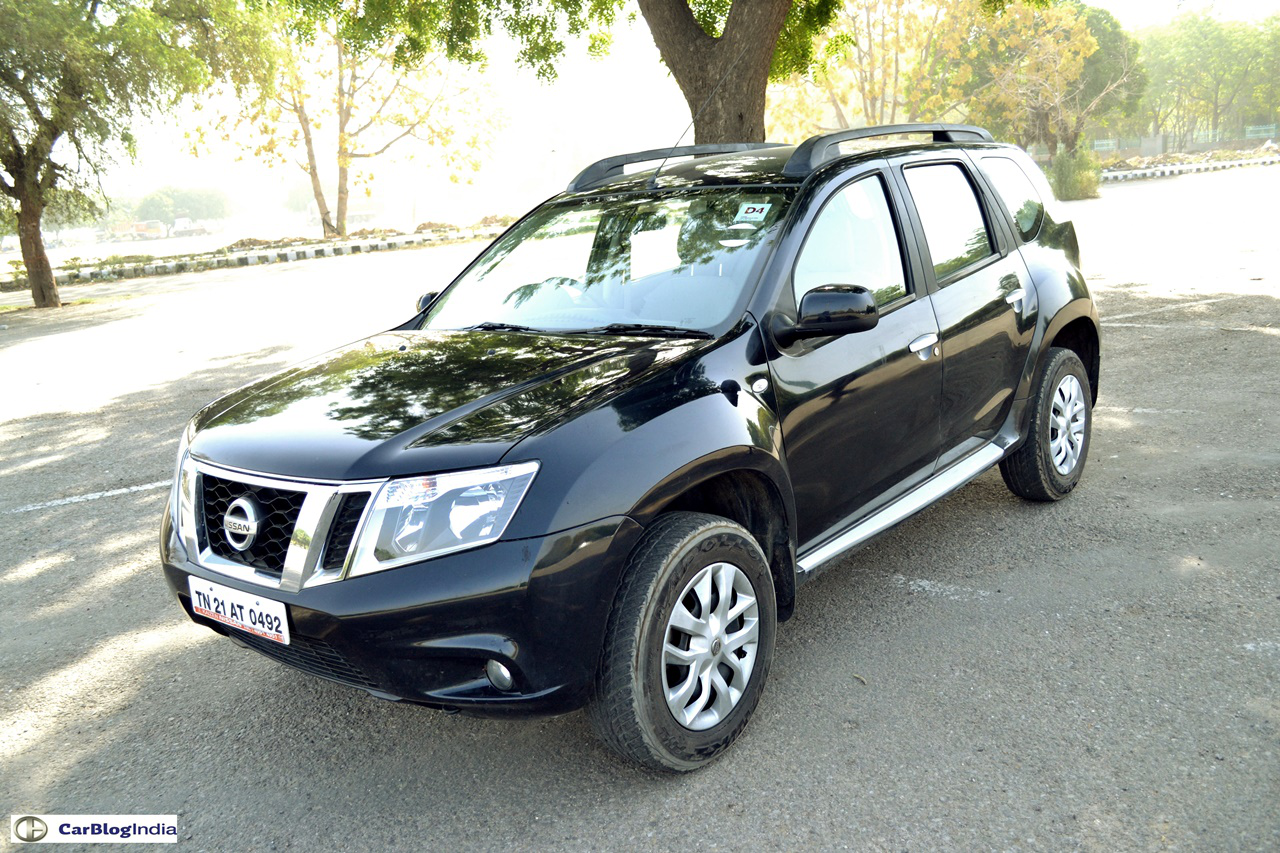

In [ ]:
from PIL import Image

img = Image.open('dataset_original/google_images/00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg')
img.show()

In [ ]:
dataset_path = "dataset_original/"
dataset_path += "google_images"
data_dir = pathlib.Path(dataset_path)

num_im = len(list(data_dir.glob('*'))) - len(list(data_dir.glob('*.xml')))
num_ann = len(list(data_dir.glob('*.xml')))

print(f"Total Images in the folder {dataset_path} are :",num_im)
print(f"Total Annotations in the folder {dataset_path} are :",num_ann)

print("Num of jpeg images :",len(list(data_dir.glob('*.jpeg'))))
print("Num of jpg images :",len(list(data_dir.glob('*.jpg'))))
print("Num of png images :",len(list(data_dir.glob('*.png'))))

Total Images in the folder dataset_original/google_images are : 443
Total Annotations in the folder dataset_original/google_images are : 440
Num of jpeg images : 306
Num of jpg images : 94
Num of png images : 41


In [ ]:
import os
cnt = 0
copies=[]
for filename in os.listdir(dataset_path):
    filename = filename.split(".")
    cnt2=0

    for filename2 in os.listdir(dataset_path):
        filename2 = filename2.split(".")
        if(filename[0] == filename2[0] and filename[len(filename)-1] != 'xml' and filename2[len(filename2)-1]=='xml'):
            cnt2+=1
            if(cnt2>1): 
                fname = ""
                for i in filename:
                    fname += i + "."
                copies.append(fname[0:-1])
    
    cnt += cnt2 
        
for copy in copies : print(copy)
print(cnt)

18f2e55e-0724-4eee-a28e-5d552a5aa045___20455d0e2dca458f13fbf4da5a2dc118.jpg - Copy.jpeg
c03a7106-1fb9-471f-bbb0-2e8f4a29759a___38e7b1109eb976088e1df2f14ac4c08c.jpg.jpeg
18f2e55e-0724-4eee-a28e-5d552a5aa045___20455d0e2dca458f13fbf4da5a2dc118.jpg.jpeg
21cc678a-b9c5-4bbb-ace0-9e096e799632___unnamed-300x225.jpg.jpeg
fac9f4e6-c4b9-4872-86da-79d58ea2adc5___5273.jpg.jpeg
21cc678a-b9c5-4bbb-ace0-9e096e799632___unnamed-300x225.jpg - Copy.jpeg
c03a7106-1fb9-471f-bbb0-2e8f4a29759a___38e7b1109eb976088e1df2f14ac4c08c.jpg - Copy.jpeg
fac9f4e6-c4b9-4872-86da-79d58ea2adc5___5273.jpg - Copy.jpeg
450


<h2> Warnings! </h2>
The number of annotations and images do not match, also we can observe there are some copies of images in this folder, which we need to remove

In [ ]:
dataset_path += "/"
for copy in copies:
    path = os.path.join(dataset_path,copy)
    os.remove(path)

In [ ]:
import os
import xml.etree.ElementTree as ET
cnt = 0
copies=[]
widths = []
heights = []

for filename_ in os.listdir(dataset_path):
    filename = filename_.split(".")
    cnt2=0

    for filename_2 in os.listdir(dataset_path):
        filename2 = filename_2.split(".")
        if(filename[0] == filename2[0] and filename[len(filename)-1] != 'xml' and filename2[len(filename2)-1]=='xml'):
            # Parse the XML file into an ElementTree object
            xml_path = dataset_path + "/" + filename_2 
            tree = ET.parse(xml_path)

            # Get the root element of the XML file
            root = tree.getroot()

            # Accessing the data in the XML file
            # Below are the dimensions provided of the bounding box
            xmin = int(root.find(".//object/bndbox/xmin").text)
            ymin = int(root.find(".//object/bndbox/ymin").text)
            xmax = int(root.find(".//object/bndbox/xmax").text)
            ymax = int(root.find(".//object/bndbox/ymax").text)

            widths.append(xmax - xmin)
            heights.append(ymax - ymin)
            

            cnt2+=1
            if(cnt2>1): 
                fname = ""
                for i in filename:
                    fname += i + "."
                copies.append(fname[0:-1])
    
    cnt += cnt2 
        
for copy in copies : print(copy)
print(cnt)

434


In [ ]:
import statistics as stats
width = stats.median(widths)
height = stats.median(heights)
print(width,height)
print(stats.mean(widths),stats.mean(heights))

# Choosing median as a better metric for scaling the sizes of all the images to a uniform size

159.0 44.5
193.00460829493088 60.44009216589862


In [ ]:
import xml.etree.ElementTree as ET
from PIL import Image
import pandas as pd

In [ ]:
data = [[]]

<h3>Creating a Folder _dataset_ and a subdirectory _Images_ in it</h3>

In [ ]:
from PIL import Image

count=0

xml_path = dataset_path

for filename in os.listdir(dataset_path):
    img_path = "dataset/Images/sample_" + str(count) + ".png"
    filename_l = filename.split(".")

    for filename2 in os.listdir(dataset_path):
        filename2_l = filename2.split(".")
        
        if(filename_l[0] == filename2_l[0] and filename_l[len(filename_l)-1] != 'xml' and filename2_l[len(filename2_l)-1]=='xml'):

            path = os.path.join(dataset_path,filename)
            xml_path = os.path.join(dataset_path,filename2)
            img = Image.open(path)
            
            # Parse the XML file into an ElementTree object
            tree = ET.parse(xml_path)

            # Get the root element of the XML file
            root = tree.getroot()

            # Accessing the data in the XML file
            # label stores the credentials of the license plate on the image
            label = root.find(".//object/name").text
        
            # Storing the labels
            data.append(["sample_" + str(count),label])
            
            # Below are the dimensions provided of the bounding box
            xmin = int(root.find(".//object/bndbox/xmin").text)
            ymin = int(root.find(".//object/bndbox/ymin").text)
            xmax = int(root.find(".//object/bndbox/xmax").text)
            ymax = int(root.find(".//object/bndbox/ymax").text)

            bndbox = (xmin,ymin,xmax,ymax)
            # Cropping the image w.r.t boundbox
            img = img.crop(bndbox)
            # Resizing image to the 2.5 times the decided width and height values    
            img = img.resize((400,110))
        
            img.save(img_path) 

            count += 1


In [ ]:
df = pd.DataFrame(data, columns = ['Image','Label'])
df = df.drop(0)

In [ ]:
df.head()

,Image,Label
1,sample_0,TN45BA1065
2,sample_1,TN99F2378
3,sample_2,HR26BP3543
4,sample_3,W0BNP300
5,sample_4,MH20EE0943


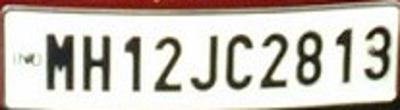

In [ ]:
# Displaying any truncated image
import random
img = Image.open('dataset/Images/sample_' + str(random.randint(0,433)) + ".png")
img.show()

In [ ]:
count

434

In [ ]:
dataset_path = 'dataset_original/State-wise_OLX/'
for filenames in os.listdir(dataset_path):
  
  for filename in os.listdir(os.path.join(dataset_path,filenames)):
    
    img_path = "dataset/Images/sample_" + str(count) + ".png"
    filename_l = filename.split(".")
    
    for filename2 in  os.listdir(os.path.join(dataset_path,filenames)):
      filename2_l = filename2.split(".")

      if(filename_l[0] == filename2_l[0] and filename_l[len(filename_l)-1] != 'xml' and filename2_l[len(filename2_l)-1]=='xml'):

            dir_path = os.path.join(dataset_path,filenames)
            path = os.path.join(dir_path,filename)
            xml_path = os.path.join(dir_path,filename2)
            img = Image.open(path)
            
            # Parse the XML file into an ElementTree object
            tree = ET.parse(xml_path)

            # Get the root element of the XML file
            root = tree.getroot()

            # Accessing the data in the XML file
            # label stores the credentials of the license plate on the image
            label = root.find(".//object/name").text
        
            # Storing the labels
            data.append(["sample_" + str(count),label])
            
            # Below are the dimensions provided of the bounding box
            xmin = int(root.find(".//object/bndbox/xmin").text)
            ymin = int(root.find(".//object/bndbox/ymin").text)
            xmax = int(root.find(".//object/bndbox/xmax").text)
            ymax = int(root.find(".//object/bndbox/ymax").text)

            bndbox = (xmin,ymin,xmax,ymax)
            # Cropping the image w.r.t boundbox
            img = img.crop(bndbox)
            # Resizing image to the 2.5 times the decided width and height values    
            img = img.resize((400,110))
        
            img.save(img_path) 

            count += 1

In [ ]:
count

1036

In [ ]:
df = pd.DataFrame(data,columns = ['Image','Label'])
df = df.drop(0)

In [ ]:
df.head()

,Image,Label
1,sample_0,TN45BA1065
2,sample_1,TN99F2378
3,sample_2,HR26BP3543
4,sample_3,W0BNP300
5,sample_4,MH20EE0943


In [ ]:
!zip -r num_plates_dataset.zip dataset/ 

In [ ]:
shutil.copy('dataset/Images/sample_0.png','sample.png')

'sample.png'

# Optical Character Recognition (OCR) Models

##1. Tesseract

In [ ]:
!sudo apt install tesseract-ocr

!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,257 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4


In [ ]:
# Returns a deSkewed image
def DeSkew(img):
  def find_score(arr, angle):
    data = scipy.ndimage.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

  delta = 1
  limit = 5
  angles = np.arange(-limit, limit+delta, delta)
  scores = []

  for angle in angles:
      hist, score = find_score(img, angle)
      scores.append(score)

  best_score = max(scores)
  best_angle = angles[scores.index(best_score)]
  # print('Best angle to be rotated at:',best_angle)

  # correct skew
  data = scipy.ndimage.rotate(img, best_angle, reshape=False, order=0)
  return data

# Converts array to RGB
def RGBconversion(deskewed_data):
  return Image.fromarray((255 * deskewed_data).astype("uint8")).convert("RGB")

# Converts array to Grayscale
def BWconversion(deskewed_data):
  return Image.fromarray((255 * deskewed_data).astype("uint8")).convert("L")

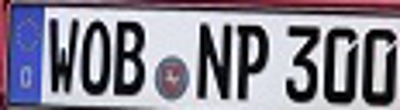

Best angle to be rotated at: 1


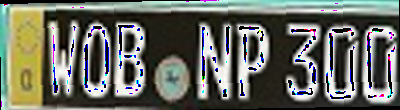

In [ ]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )

import cv2
# pytesseract.pytesseract.tesseract_cmd =""
img_path = os.path.join('dataset/Images/sample_3.png')
img = Image.open(img_path)
img2 = img
img2.show()
# Preprocessing the image before passing it to OCR
import scipy
import sys
import matplotlib.pyplot as plt
import numpy as np
# from scipy.ndimage import interpolation as inter
 
img_array = DeSkew(img)
img = RGBconversion(img_array)

img.save('skew_corrected.png')

img.show()

In [ ]:

text = pytesseract.image_to_string(img)
print('Before cleaning the output text:',text)
# Cleaning the output string generated by Tesseract
text = text.split('\n')
text = text[len(text)-2] 
text = text.replace("_"," ")
text = text.replace(" ","")

text2 = text
for i in text2:
  if((ord(i) <= ord('Z') and ord(i)>=ord('A'))or(ord(i)<=ord('z')and ord(i)>=ord('a'))or(ord(i)<=ord('9')and ord(i)>=ord('0'))): continue
  else : text = text.replace(i,"")

print("Predicted text by Tesseract :",text)

Before cleaning the output text: 
Predicted text by Tesseract : 


In [ ]:
cnt4=0
data_p = []
dir_path = 'dataset/Images'
for filename in os.listdir(dir_path):
  img_path = os.path.join(dir_path,filename)
  img = Image.open(img_path)

  # Preprocessing
  img_array = DeSkew(img)
  img = RGBconversion(img_array)
  
  # Predicting the text using Tesseract
  text = pytesseract.image_to_string(img)
  # print('Before cleaning the output text:',text)
  
  # Cleaning the output string generated by Tesseract
  text = text.split('\n')
  if(len(text) > 1) : text = text[len(text)-2] 
  else : text = str(text)
  text = text.replace("_"," ")
  text = text.replace(" ","")

  text2 = text
  for i in text2:
    if((ord(i) <= ord('Z') and ord(i)>=ord('A'))or(ord(i)<=ord('z')and ord(i)>=ord('a'))or(ord(i)<=ord('9')and ord(i)>=ord('0'))): continue
    else : text = text.replace(i,"")
  
  data_p.append(text)
  # 

In [ ]:
df['Predicted (Deskew+RGB)'] = data_p

In [ ]:
df

,Image,Label,Predicted (Deskew+RGB)
1,sample_0,TN45BA1065,aanplarar
2,sample_1,TN99F2378,aRL
3,sample_2,HR26BP3543,eaeOe
4,sample_3,W0BNP300,
5,sample_4,MH20EE0943,Mtresl
...,...,...,...
1032,sample_1031,UK06J3953,480659477
1033,sample_1032,UK06CB4595,POT
1034,sample_1033,UK07BK5014,
1035,sample_1034,UP23K0008,reeEaye


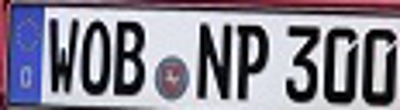

In [ ]:
img.show()

'ye nu 63Ae'